In [11]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 799.2 kB/s eta 0:00:14
   - -------------------------------------- 0.5/11.1 MB 799.2 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/11.1 MB 799.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/11.1 MB 799.2 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.1 MB 671.6 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.1 MB 762.6 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 762.6 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 762.6 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 762.6 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/11.1 MB 582.5 kB/s eta 0:00:17


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [13]:
image_path="../output_videos/cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

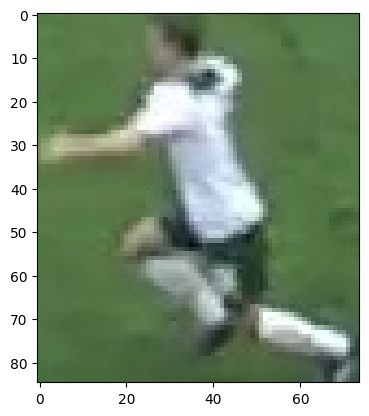

In [14]:
plt.imshow(image)
plt.show

Take the top half of the image


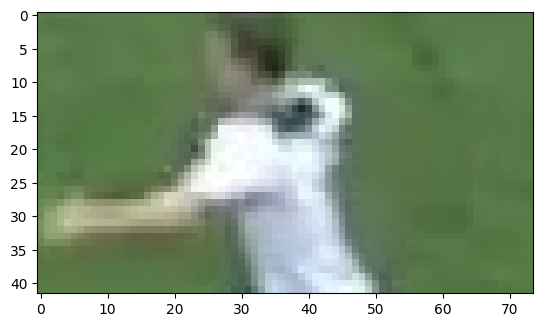

In [9]:
top_half_image= image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

Cluster the image into two clusters

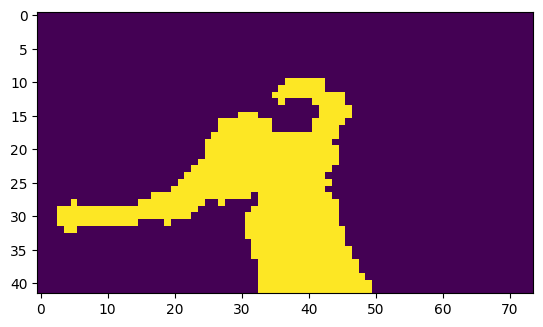

In [17]:
#Reshape the image into 2d array
image_2d=top_half_image.reshape(-1,3)

#perform k-means clustering with 2 clusters
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels=kmeans.labels_

#reshape the labels into the original image shape
clustered_image=labels.reshape(top_half_image.shape[0],image.shape[1])

#Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [18]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

0


In [19]:
player_cluster=1-non_player_cluster
print(player_cluster)

1


In [21]:
kmeans.cluster_centers_[player_cluster]

array([198.61690647, 209.05215827, 211.8057554 ])